# Random Forest for football stats match prediction

In [1]:
import pandas as pd

df_games_stats = pd.read_csv("../data/data_extended.csv", index_col=0)

df_games_stats.head()

,team_ids,round_ids,shots_total,shots_ongoal,shots_offgoal,shots_insidebox,shots_outsidebox,passes_total,passes_percentage,attacks_total,...,corners,possession_time,yellow_cards,red_cards,saves,substitutions,tackles,penalties,injuries,results
0,273,194968,-11,-2.0,-9.0,-4.0,-6.0,-202.0,-10.47,-18.0,...,-4.0,-22,1.0,1.0,2.0,3.0,-8.0,NaN,NaN,-1
1,62,194968,11,2.0,9.0,4.0,6.0,202.0,10.47,18.0,...,4.0,22,-1.0,-1.0,-2.0,-3.0,8.0,NaN,NaN,1
2,496,194968,-5,0.0,-5.0,-1.0,-5.0,-44.0,-5.46,-42.0,...,-3.0,-8,1.0,NaN,2.0,-1.0,-6.0,NaN,NaN,1
3,258,194968,5,0.0,5.0,1.0,5.0,44.0,5.46,42.0,...,3.0,8,-1.0,NaN,-2.0,1.0,6.0,NaN,NaN,-1
4,282,194968,4,-2.0,6.0,3.0,2.0,201.0,16.08,27.0,...,0.0,22,-3.0,NaN,0.0,0.0,-2.0,1.0,NaN,0


In [2]:
df_games_stats.isnull().sum()

team_ids                0
round_ids               0
shots_total             0
shots_ongoal           46
shots_offgoal          12
shots_insidebox         8
shots_outsidebox       26
passes_total            4
passes_percentage       6
attacks_total           2
attacks_dangerous       2
fouls                  46
corners                14
possession_time         0
yellow_cards          198
red_cards            1180
saves                  94
substitutions          16
tackles                16
penalties            1080
injuries              780
results                 0
dtype: int64

In [3]:
df_games_stats.fillna(0, inplace=True)
df_games_stats.isnull().sum()

team_ids             0
round_ids            0
shots_total          0
shots_ongoal         0
shots_offgoal        0
shots_insidebox      0
shots_outsidebox     0
passes_total         0
passes_percentage    0
attacks_total        0
attacks_dangerous    0
fouls                0
corners              0
possession_time      0
yellow_cards         0
red_cards            0
saves                0
substitutions        0
tackles              0
penalties            0
injuries             0
results              0
dtype: int64

In [4]:
df_games_stats

,team_ids,round_ids,shots_total,shots_ongoal,shots_offgoal,shots_insidebox,shots_outsidebox,passes_total,passes_percentage,attacks_total,...,corners,possession_time,yellow_cards,red_cards,saves,substitutions,tackles,penalties,injuries,results
0,273,194968,-11,-2.0,-9.0,-4.0,-6.0,-202.0,-10.47,-18.0,...,-4.0,-22,1.0,1.0,2.0,3.0,-8.0,0.0,0.0,-1
1,62,194968,11,2.0,9.0,4.0,6.0,202.0,10.47,18.0,...,4.0,22,-1.0,-1.0,-2.0,-3.0,8.0,0.0,0.0,1
2,496,194968,-5,0.0,-5.0,-1.0,-5.0,-44.0,-5.46,-42.0,...,-3.0,-8,1.0,0.0,2.0,-1.0,-6.0,0.0,0.0,1
3,258,194968,5,0.0,5.0,1.0,5.0,44.0,5.46,42.0,...,3.0,8,-1.0,0.0,-2.0,1.0,6.0,0.0,0.0,-1
4,282,194968,4,-2.0,6.0,3.0,2.0,201.0,16.08,27.0,...,0.0,22,-3.0,0.0,0.0,0.0,-2.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1277,1703,194388,-16,-4.0,-12.0,-10.0,-3.0,-289.0,-21.21,-55.0,...,-8.0,-38,0.0,0.0,2.0,1.0,1.0,0.0,1.0,-1
1278,1789,194388,-9,-4.0,-5.0,-6.0,-3.0,-264.0,-9.16,-31.0,...,-6.0,-28,0.0,0.0,2.0,-1.0,8.0,0.0,1.0,-1
1279,86,194388,9,4.0,5.0,6.0,3.0,264.0,9.16,31.0,...,6.0,28,0.0,0.0,-2.0,1.0,-8.0,0.0,-1.0,1
1280,2650,194388,1,-1.0,2.0,7.0,-3.0,-65.0,-4.16,10.0,...,-1.0,-10,0.0,0.0,0.0,1.0,-4.0,1.0,2.0,0


In [5]:
predictors = df_games_stats.columns[2:-1]
col_to_remove = {"substitutions", "injuries", "tackles", "fouls", "yellow_cards"}
predictors = list(set(predictors) - col_to_remove)
print(predictors)

['red_cards', 'passes_total', 'corners', 'shots_total', 'attacks_total', 'shots_ongoal', 'passes_percentage', 'possession_time', 'shots_offgoal', 'saves', 'shots_insidebox', 'shots_outsidebox', 'attacks_dangerous', 'penalties']


In [6]:
for col in predictors: # Loop through all columns in predictors
    if df_games_stats[col].dtype == 'object':  # check if column's type is object (text)
        df_games_stats[col] = pd.Categorical(df_games_stats[col]).codes  # convert text to numerical

df_games_stats.head()
df_games_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1282 entries, 0 to 1281
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   team_ids           1282 non-null   int64  
 1   round_ids          1282 non-null   int64  
 2   shots_total        1282 non-null   int64  
 3   shots_ongoal       1282 non-null   float64
 4   shots_offgoal      1282 non-null   float64
 5   shots_insidebox    1282 non-null   float64
 6   shots_outsidebox   1282 non-null   float64
 7   passes_total       1282 non-null   float64
 8   passes_percentage  1282 non-null   float64
 9   attacks_total      1282 non-null   float64
 10  attacks_dangerous  1282 non-null   float64
 11  fouls              1282 non-null   float64
 12  corners            1282 non-null   float64
 13  possession_time    1282 non-null   int64  
 14  yellow_cards       1282 non-null   float64
 15  red_cards          1282 non-null   float64
 16  saves              1282 

In [7]:
from sklearn.model_selection import train_test_split

y = pd.DataFrame(data=df_games_stats["results"])
x = pd.DataFrame(data=df_games_stats[predictors])

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

print ("train shape", X_train.shape, y_train.shape)
print ("test shape", X_test.shape, y_test.shape)

train shape (897, 14) (897, 1)
test shape (385, 14) (385, 1)


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

params = {'min_samples_leaf': list(range(1, 5)), 'min_samples_split': list(range(2, 10, 2)),
          'n_estimators': list(range(10, 50, 10)), 'max_depth': list(range(1, 10))}

clf_rf = RandomForestClassifier()
clf_gs = GridSearchCV(clf_rf, params, scoring='accuracy', cv=5)
clf_gs.fit(df_games_stats[predictors], df_games_stats["results"])

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [10, 20, 30, 40]},
             scoring='accuracy')

In [9]:
print(clf_gs.best_score_)
print(clf_gs.best_params_)

0.6263527480544747
{'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 40}


In [10]:
clf_rf = RandomForestClassifier(random_state=1, max_depth=clf_gs.best_params_["max_depth"], min_samples_leaf=clf_gs.best_params_["min_samples_leaf"],
    min_samples_split=clf_gs.best_params_["min_samples_split"], n_estimators=clf_gs.best_params_["n_estimators"])

clf_rf.fit(X_train, y_train.values.ravel())
print ('train accuracy =', clf_rf.score(X_train, y_train))
print ('test accuracy =', clf_rf.score(X_test, y_test))

scores_rf = cross_val_score(clf_rf, df_games_stats[predictors], df_games_stats["results"], scoring='accuracy', cv=5)
print('cross validation accuracy =', scores_rf.mean())

train accuracy = 0.7513935340022296
test accuracy = 0.638961038961039
cross validation accuracy = 0.6154152480544747


<AxesSubplot:title={'center':'Importance of features'}>

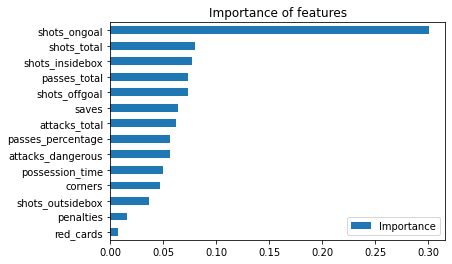

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

feat_imp = pd.DataFrame(clf_rf.feature_importances_, predictors, columns=['Importance'])
feat_imp.sort_values('Importance', ascending=True).plot(kind="barh", title="Importance of features")